In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

### Avocado Analyzer Initial Setup
- Read the .csv file into a dataframe and take a quick look at it
- Plot out some of the data so you have an understanding of what's actually going on

In [4]:
df = pd.read_csv('./avocado.csv', index_col = 0, skiprows = 0)

# Convert the dates to datetime and set them in order
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

df.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany


The mean (average) global avocado price is: 1.4059784097758825 dollars


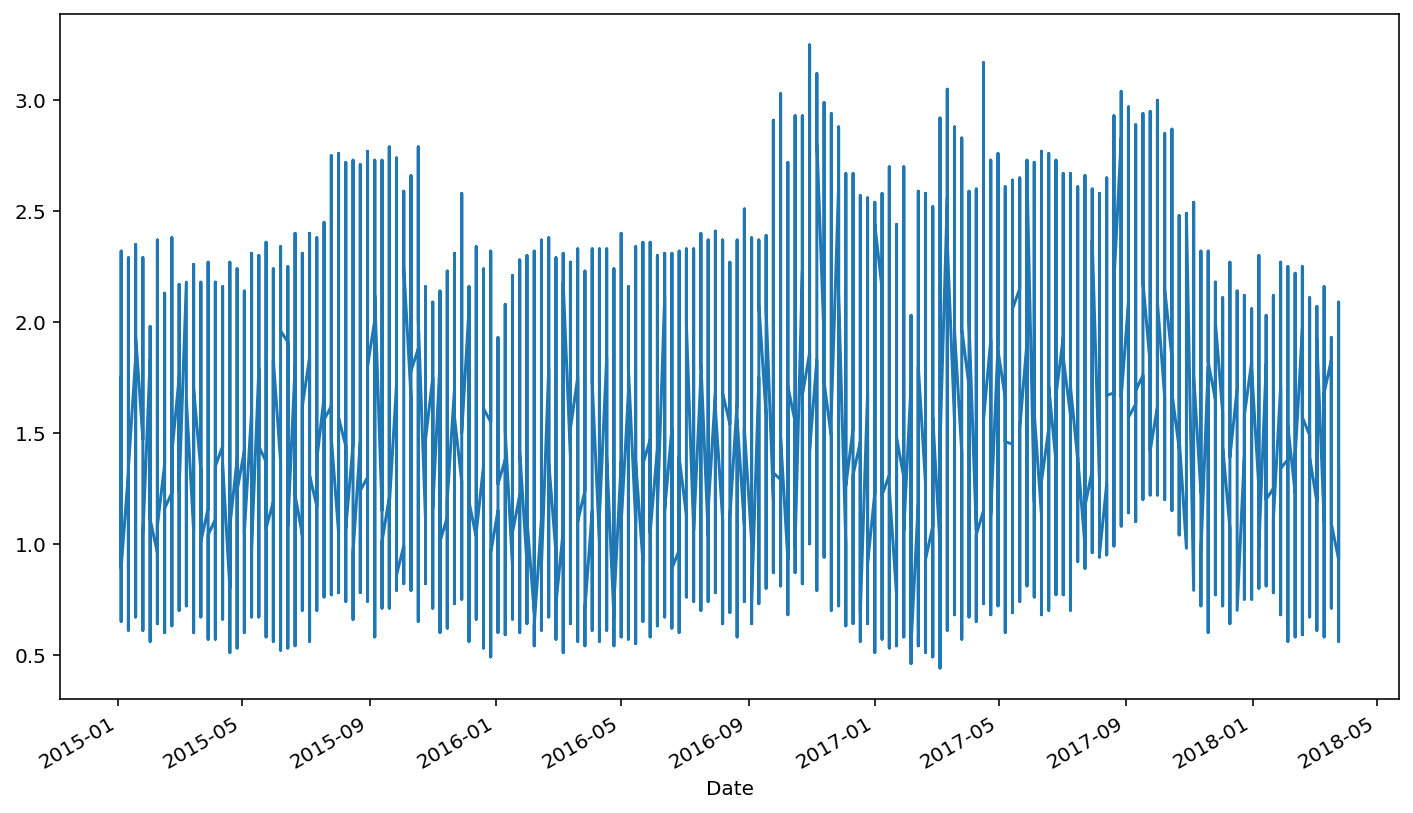

In [5]:
# Average Price by Date
df["AveragePrice"].plot()

mean_value = df["AveragePrice"].mean()
print(f"The mean (average) global avocado price is: {mean_value} dollars") # Using fstrings

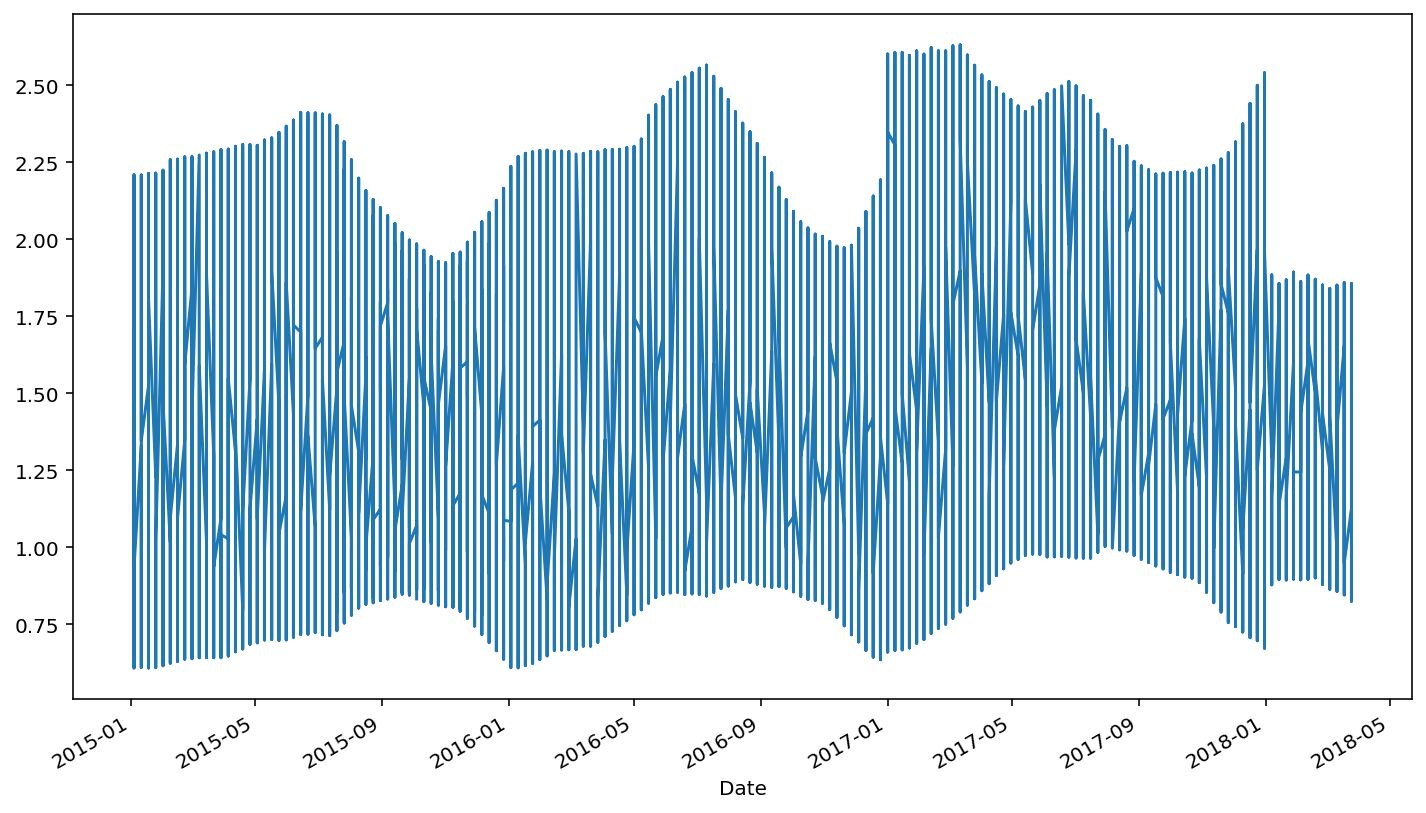

In [6]:
# Now let's take a look at the rolling average plotted over time

df['AveragePrice'].rolling(25).mean().plot()

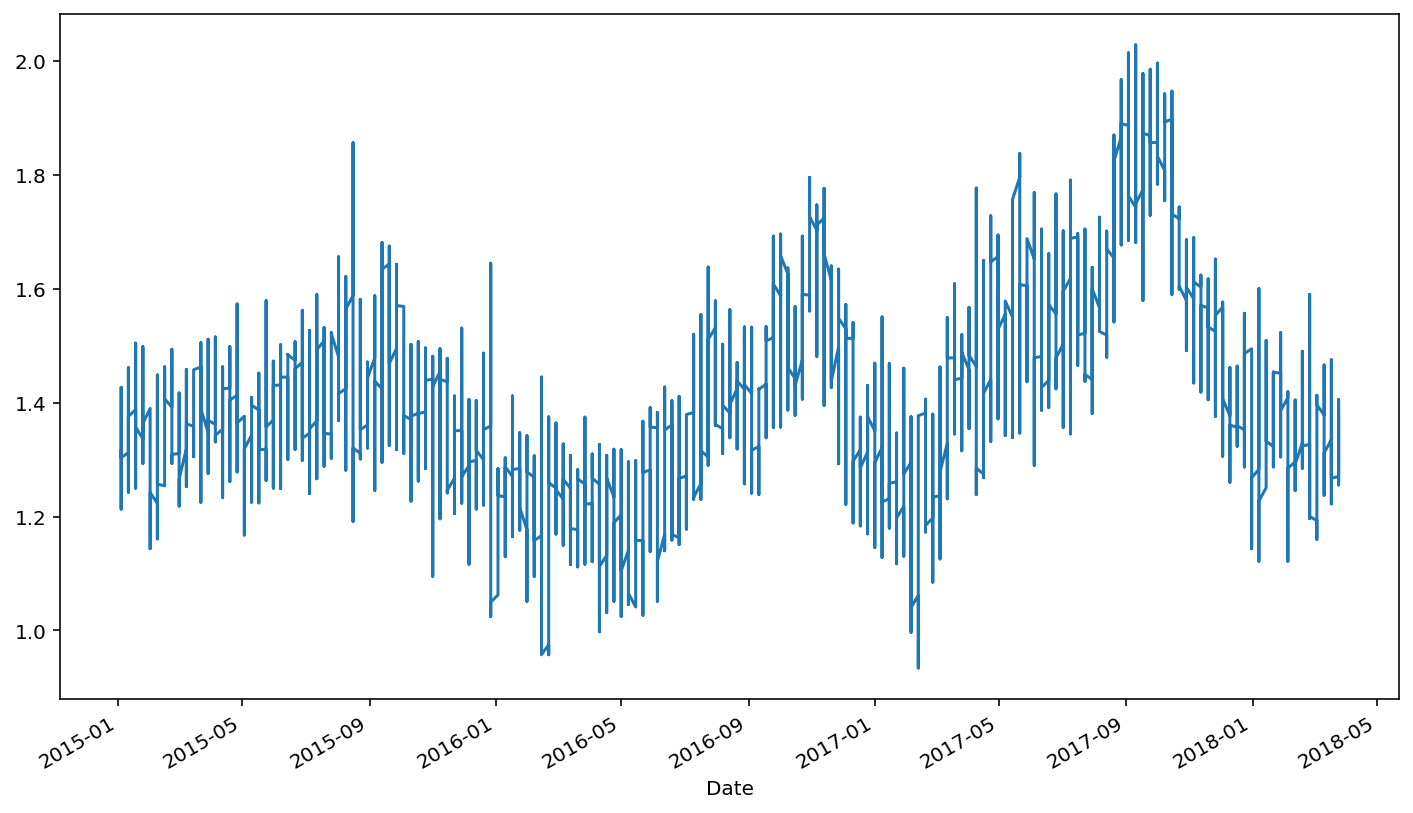

In [7]:
# So YES the dates are in reverse chronological order, but the indices are not. Which is making
# the graph look very suspicious.

df.sort_index(inplace = True) # Sorting the indices
df['AveragePrice'].rolling(25).mean().plot() # Re-plot the rolling average

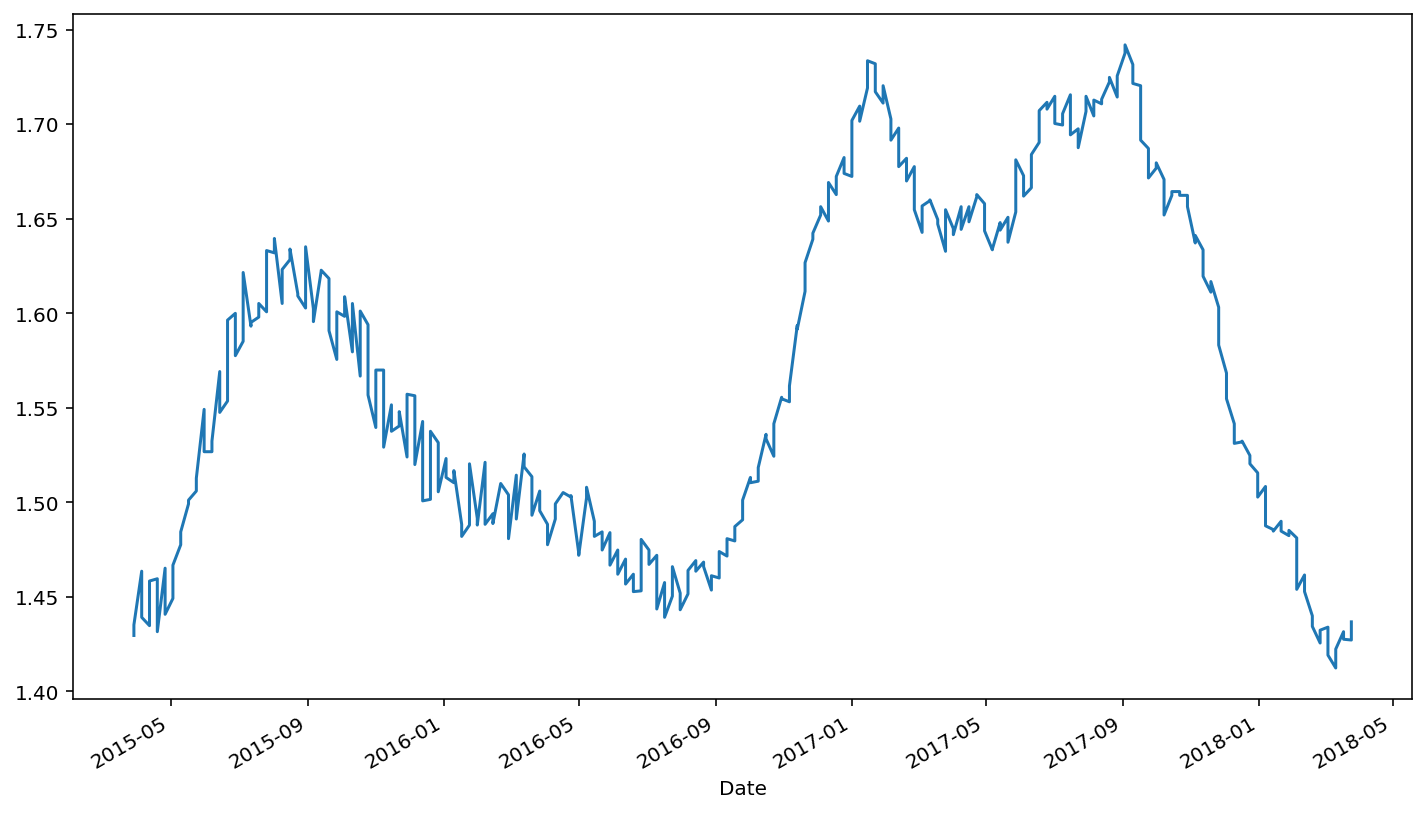

In [8]:
# Looking at specifically the Albany region

albany_df = df.copy()[df['region'] == 'Albany']

# Create a column for the 25 rolling average
albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean()

albany_df['price25ma'].plot()


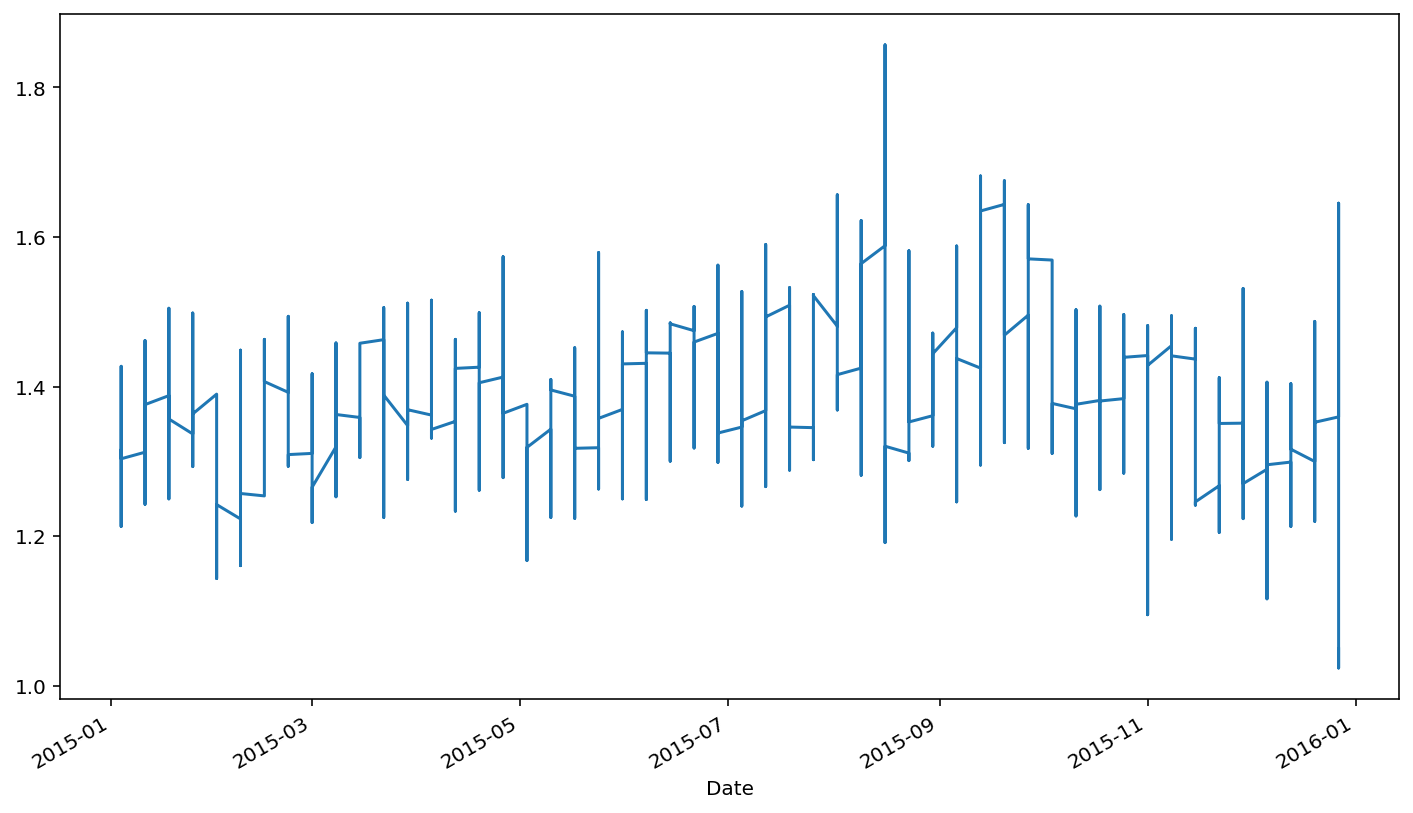

In [9]:
# Looking at the rolling average (25MA) of mean prices during the year 2015

df_2015 = df[ df['year'] == 2015 ]
df_2015['AveragePrice'].rolling(25).mean().plot()

In [10]:
df['region'].unique() # Returns all of the unique values of the dataframe region column

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

### Data Adjustments

- Now our task is to adjust the DataFrame so that the column headers are actually the individual regions and our individual rows/values are everything else. With the indices being the dates still.

In [11]:
graph_df = pd.DataFrame()
graph_df.sort_index(inplace = True)

for region in df['region'].unique()[:10]:
    print(region)
    region_df = df.copy()[df['region'] == region]
    region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()

    if graph_df.empty:
        graph_df = region_df[[f'{region}_price25ma']] # Because using df[...] returns a Series object, we use df[[]] to return as a DataFrame

    else:
        # Use df.join(df2) to join both DataFrames by their index
        graph_df = graph_df.join(region_df[f'{region}_price25ma'])


Southeast
Chicago
HarrisburgScranton
Pittsburgh
Boise
WestTexNewMexico
LosAngeles
LasVegas
Atlanta
DallasFtWorth


In [13]:
graph_df.tail(3)

,Southeast_price25ma,Chicago_price25ma,HarrisburgScranton_price25ma,Pittsburgh_price25ma,Boise_price25ma,WestTexNewMexico_price25ma,LosAngeles_price25ma,LasVegas_price25ma,Atlanta_price25ma,DallasFtWorth_price25ma
Date,,,,,,,,,,
2018-03-25,1.294,1.5708,1.338,1.2804,1.5016,1.266,1.3328,1.3796,1.2848,1.1180
2018-03-25,1.294,1.5708,1.338,1.2804,1.5016,1.266,1.3328,1.3796,1.2884,1.1248
2018-03-25,1.294,1.5708,1.338,1.2804,1.5016,1.266,1.3328,1.3796,1.2884,1.1180
